In [5]:
import pandas as pd
import numpy as np

from sklearn import svm

import svm_spam

import matplotlib.pyplot as plt


In [6]:
n_cls = 20   # Number of samples in each class.

np.random.seed(1)  # for reproducibility
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2)  # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3)  # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4)  # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))

X = np.vstack((
    np.hstack((x11, x12)),
    np.hstack((x21, x22))
))

y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))


In [7]:
clf = svm.SVC(kernel='linear', C=1000, random_state=59, probability=True)
clf.fit(X, y)


SVC(C=1000, kernel='linear', probability=True, random_state=59)

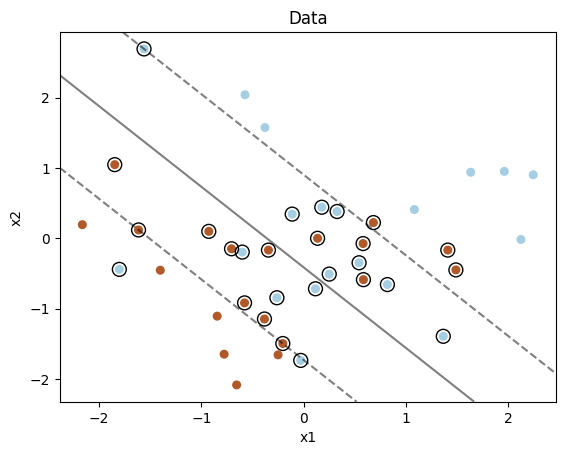

In [8]:
fig = plt.figure(1)
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()


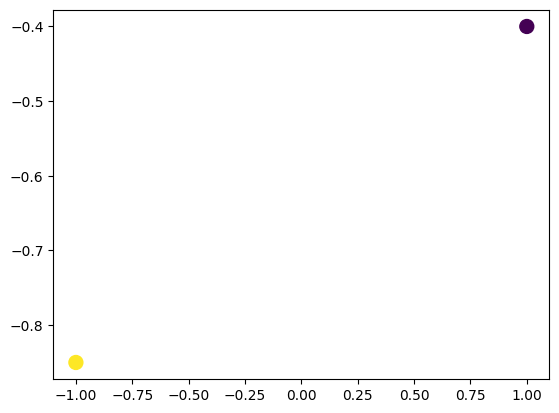

In [9]:
X_new = np.array([
    [1, -0.4],
    [-1, -0.85],
])

y_new = clf.predict(X_new)

plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()


In [10]:
# Get posterior probabilities for predictions (requires SVC to be created with
#   `probability=True`).
post_probs = clf.predict_proba(X_new)
print(post_probs)


[[0.6000429  0.3999571 ]
 [0.31801531 0.68198469]]


In [11]:
svm_spam.main()


Preprocessing sample email (emailSample1.txt)


==== Processed Email ====


anyon 
know 
how 
much 
it 
cost 
to 
host 
a 
web 
portal 
well 
it 
depend 
on 
how 
mani 
visitor 
your 
expect 
thi 
can 
be 
anywher 
from 
less 
than 
number 
buck 
a 
month 
to 
a 
coupl 
of 
dollarnumb 
you 
should 
checkout 
httpaddr 
or 
perhap 
amazon 
ec 
if 
your 
run 
someth 
big 
to 
unsubscrib 
yourself 
from 
thi 
mail 
list 
send 
an 
email 
to 
emailaddr 


Word Indices: 

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 512, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]




Extracting features from sample email (emailSample1.txt)


==== Processed Email ====


anyon 
know 
how 
much 
it 
cost 
to 
host 
a 
web 
portal 
well 
it 
depend 
on 
how 
mani 
visitor 
your 
expect 
thi 
can 
be 
anywher 
from 
les